# For CLustering using kmeans elbow wcss test and shiloutee method

# 3. importing all libraries and Data collection and preprocessing

In [1]:
#############  1. Import all necessary libraries ###########################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns  # for better visualization of confusion matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [11]:
# Load dataset
mushrooms = pd.read_excel('C:/Users/subas/Downloads/Mushroom.xlsx')
mushrooms.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Class                     8124 non-null   object
 1   Cap-shape                 8124 non-null   object
 2   Cap-surface               8124 non-null   object
 3   Cap-color                 8124 non-null   object
 4   Bruises                   8124 non-null   object
 5   Odor                      8124 non-null   object
 6   Gill-attachment           8124 non-null   object
 7   Gill-spacing              8124 non-null   object
 8   Gill-size                 8124 non-null   object
 9   Gill-color                8124 non-null   object
 10  Stalk-shape               8124 non-null   object
 11  Stalk-root                8124 non-null   object
 12  Stalk-surface-above-ring  8124 non-null   object
 13  Stalk-surface-below-ring  8124 non-null   object
 14  Stalk-color-above-ring  

D:\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [9]:
# Convert categorical variable into dummy/indicator variables
mushrooms_encoded = pd.get_dummies(mushrooms)
mushrooms_encoded.head()


,Class_e,Class_p,Cap-shape_b,Cap-shape_c,Cap-shape_f,Cap-shape_k,Cap-shape_s,Cap-shape_x,Cap-surface_f,Cap-surface_g,...,Population_s,Population_v,Population_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
# Scale features to have the same variance
scaler = StandardScaler()
mushrooms_scaled = scaler.fit_transform(mushrooms_encoded)

# Number of dimensions
print("Number of dimensions: ", mushrooms_scaled.ndim)

# Shape of the array
print("Shape of array: ", mushrooms_scaled.shape)


Number of dimensions:  2
Shape of array:  (8124, 119)


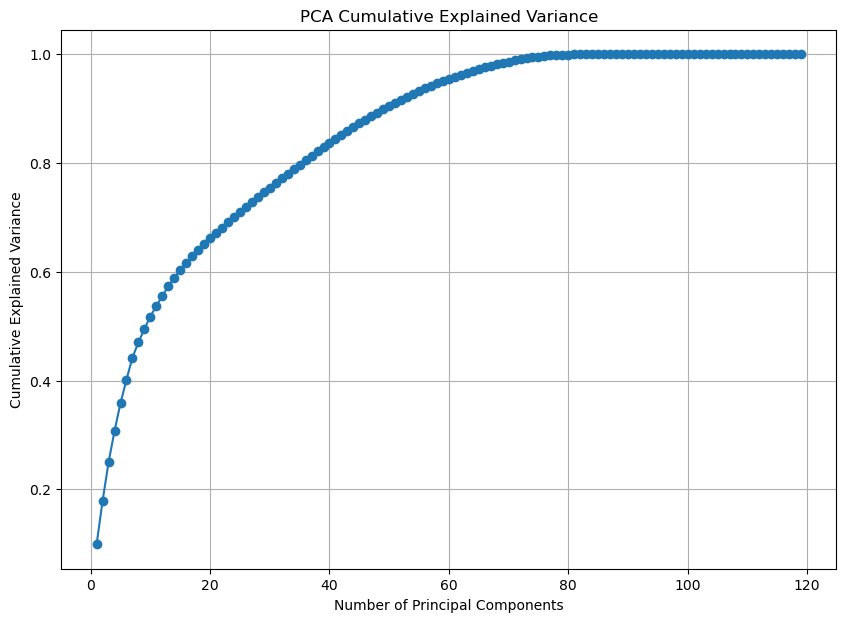

In [5]:
# Compute PCA without reducing dimensionality
pca = PCA()
mushrooms_pca = pca.fit_transform(mushrooms_scaled)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [6]:
# Perform PCA, here I use 72 components for the figure
pca = PCA(n_components=72)
mushrooms_pca = pca.fit_transform(mushrooms_scaled)


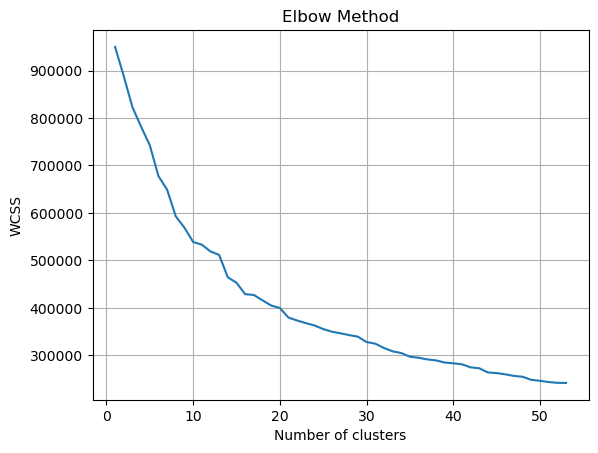

In [7]:

############### Finding no of clusters in dataset using PCA K means Elbow test #########################################
############# with pca dimension reduction########################################## ####################

# Elbow method to determine optimal number of clusters

# In this code, the convergence criterion is set to a decrease of less than 1% (0.01) in WCSS. 
# The loop continues until this criterion is met. Note that the number of clusters starts from 1 and increments each iteration.

wcss = [] # within-cluster sum of squares
n_clusters = 1
threshold = 0.001 # stopping criterion, defined as percentage decrease in WCSS
prev_wcss = 0

while True:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=1, random_state=42)
    kmeans.fit(mushrooms_pca)
    wcss.append(kmeans.inertia_)
    if n_clusters > 1:
        diff = prev_wcss - kmeans.inertia_
        if diff / prev_wcss < threshold:
            break
    prev_wcss = kmeans.inertia_
    n_clusters += 1

# Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, n_clusters+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.grid(True)
plt.show()




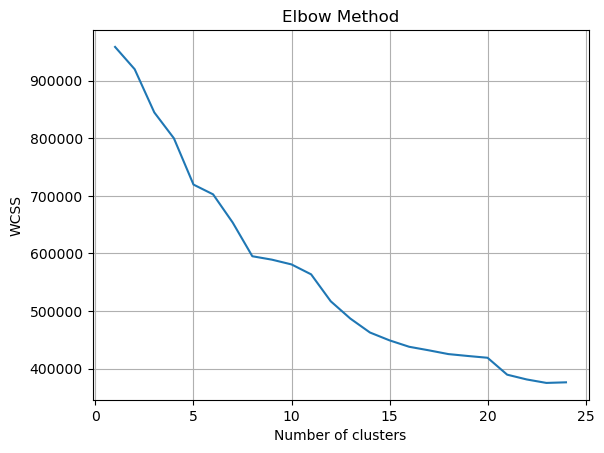

In [8]:
############### Finding no of clusters in dataset using K means Elbow test #########################################
################ no pca ( as some feature are highly dependent on each other attributes) #####################################

# Elbow method to determine optimal number of clusters



# In this code, the convergence criterion is set to a decrease of less than 1% (0.01) in WCSS. 
# The loop continues until this criterion is met. Note that the number of clusters starts from 1 and increments each iteration.

wcss = [] # within-cluster sum of squares
n_clusters = 1
threshold = 0.001 # stopping criterion, defined as percentage decrease in WCSS
prev_wcss = 0
while True:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=1, random_state=42)
    kmeans.fit(mushrooms_scaled)
    wcss.append(kmeans.inertia_)
    if n_clusters > 1:
        diff = prev_wcss - kmeans.inertia_
        if diff / prev_wcss < threshold:
            break
    prev_wcss = kmeans.inertia_
    n_clusters += 1

# Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, n_clusters+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.grid(True)
plt.show()